# Wavelet representation
Stefan/Yuzhao Heng
Since Wed. Sep. 29th, 2021

Wavelets breaks down signals at different scale, starting from the rough trend to detailed textues.

The sum of the wavelets also restores the original signal.

Introducing such a breakup might help machines learn features at different scale. Intuitively, this also aligns with how human eyes see.


## Setup



In [1]:
import os
from math import isclose

import numpy as np
import matplotlib.pyplot as plt

import pywt

from icecream import ic

from util import *
from ecg_data import EcgData
from ecg_label import EcgLabel

os.chdir('../../PVC_DATA')

dnm = 'daeVt'
dg = EcgData()



## Plot a few
How come a signal can be decomposed into a *few* coefficients, as in paper *Automatic pattern recognition in ECG time series*?



daeVt 8, wall: FW; side: EP; vent: NA


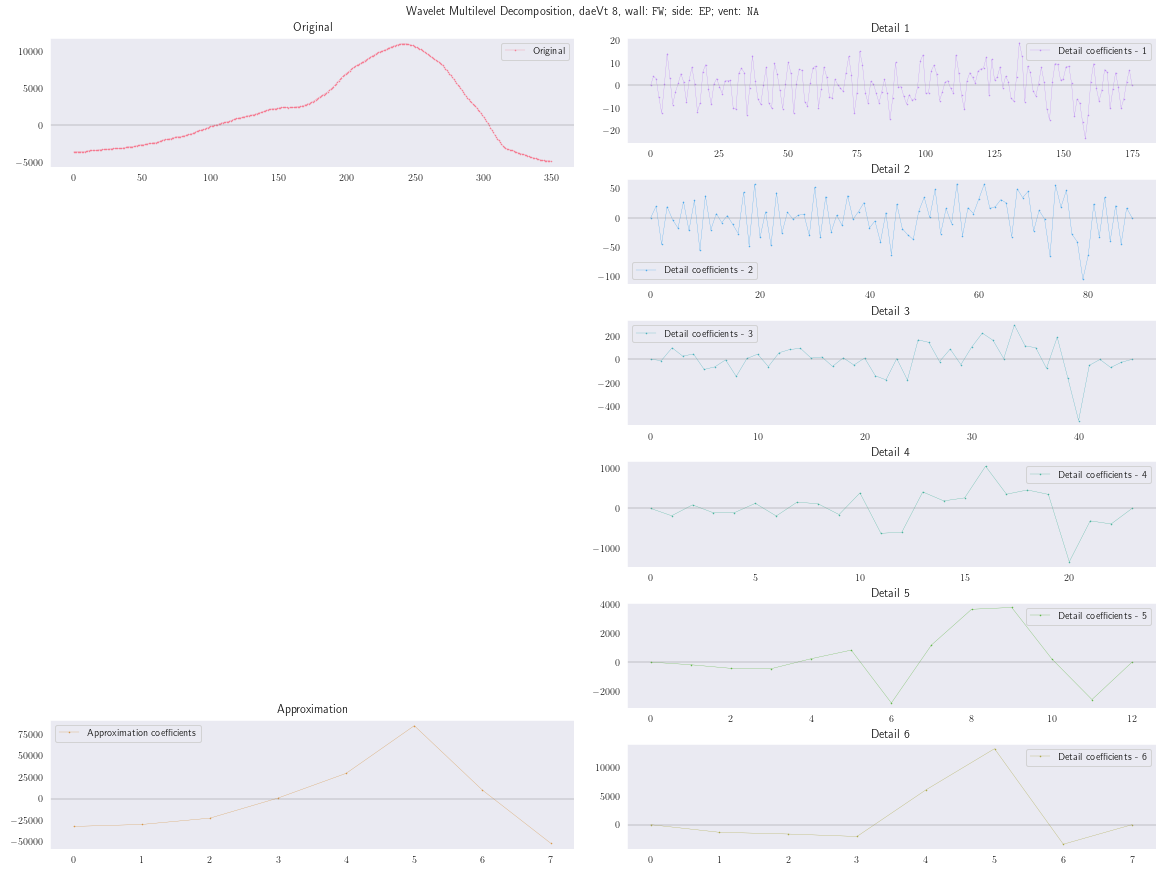

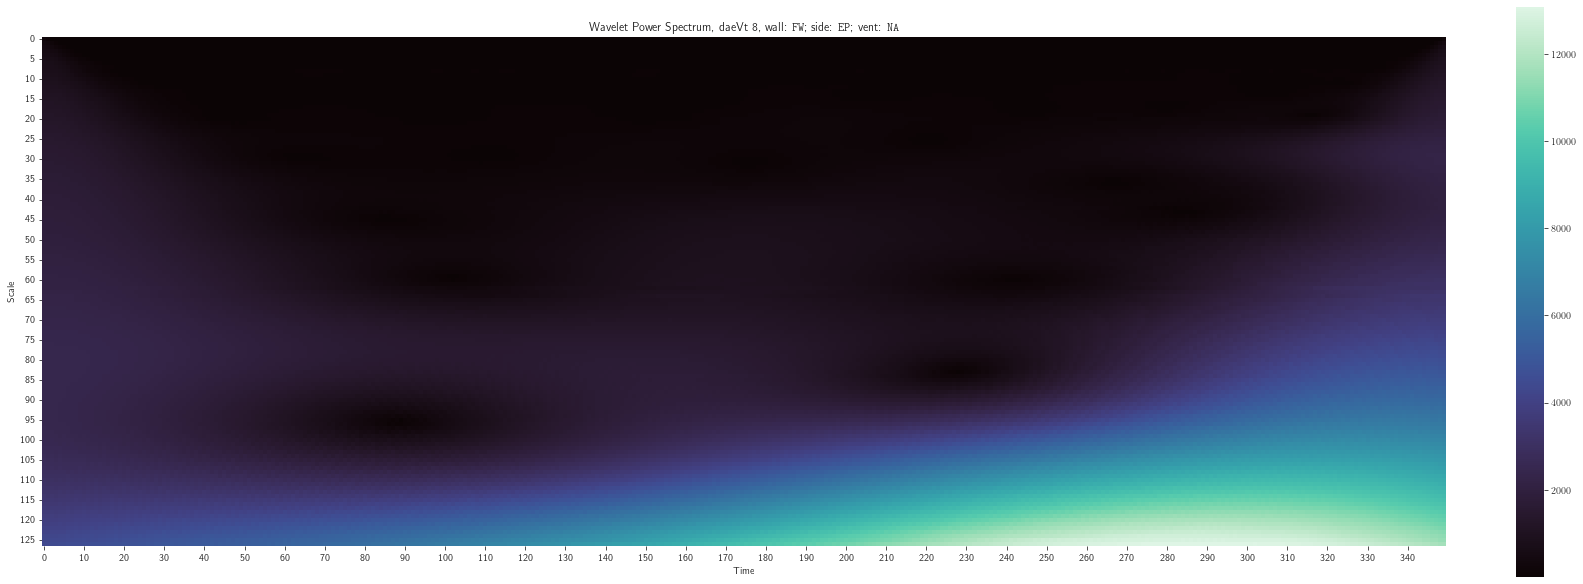

daeVt 9, wall: FW; side: IM; vent: NA


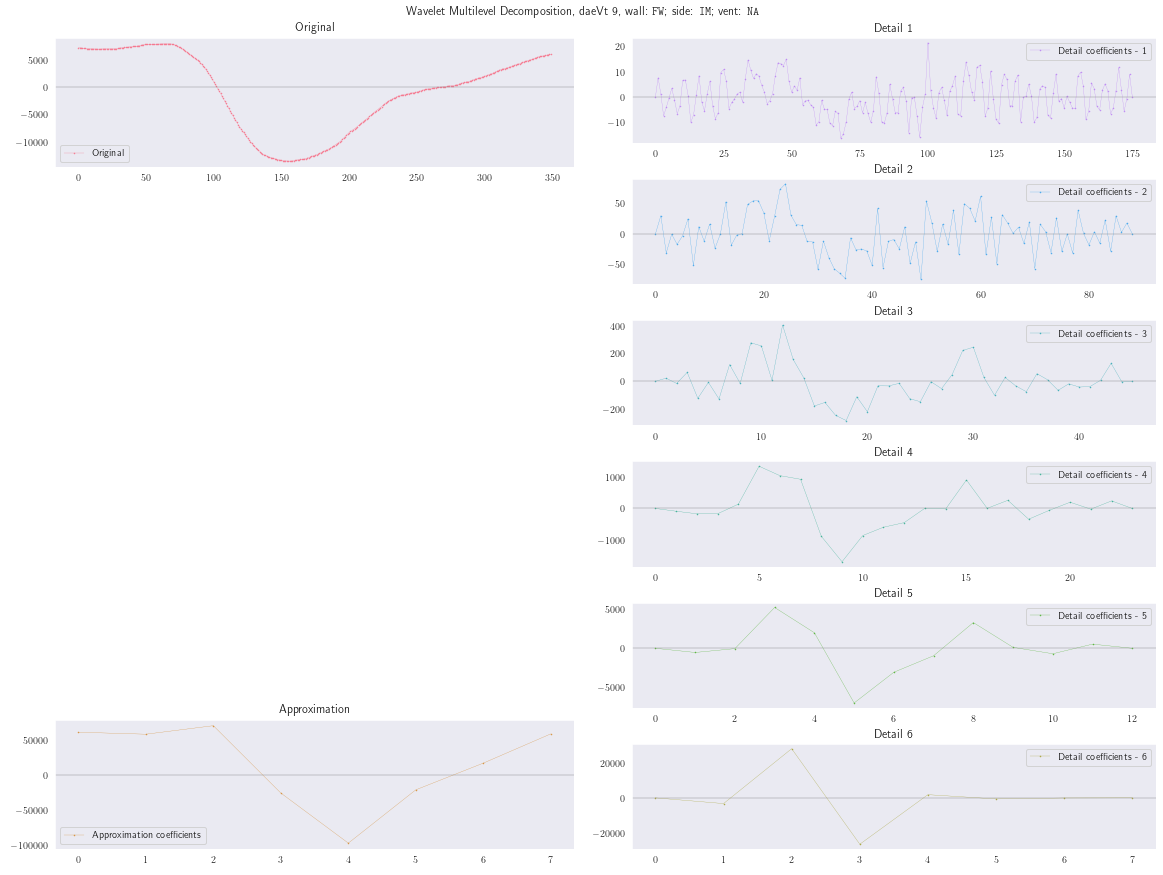

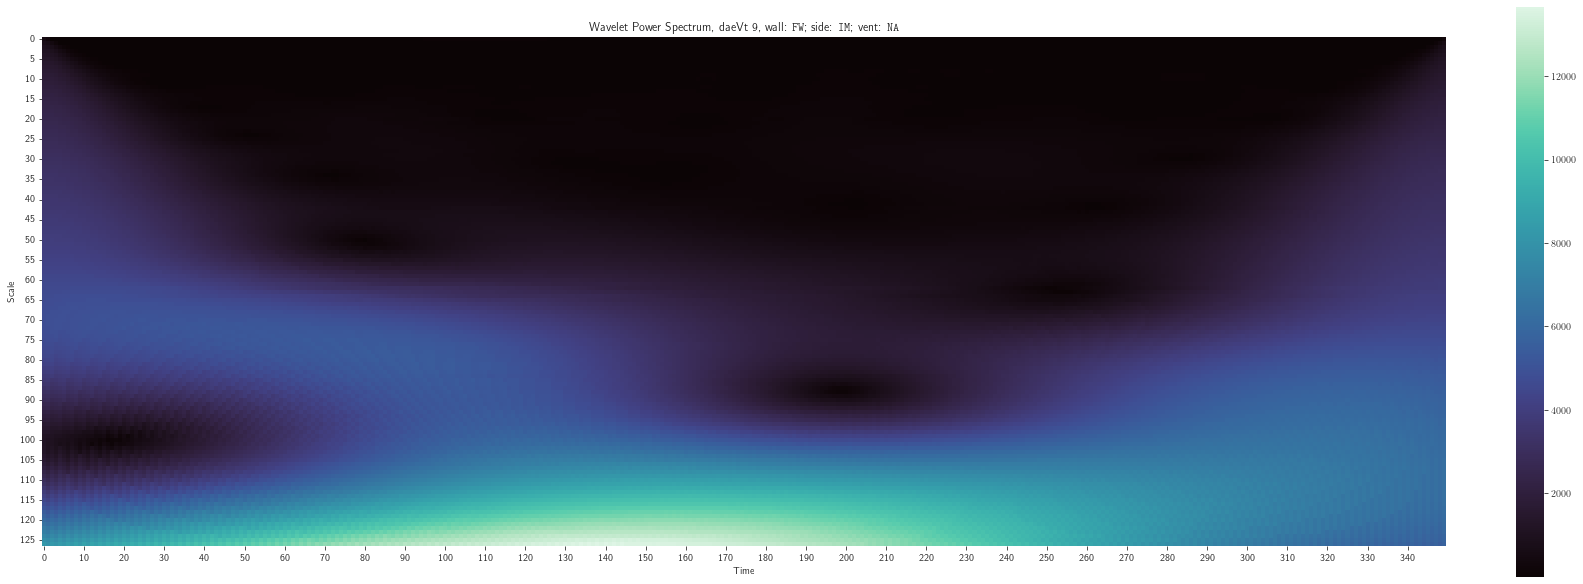

daeVt 124, wall: FW; side: ED; vent: LV


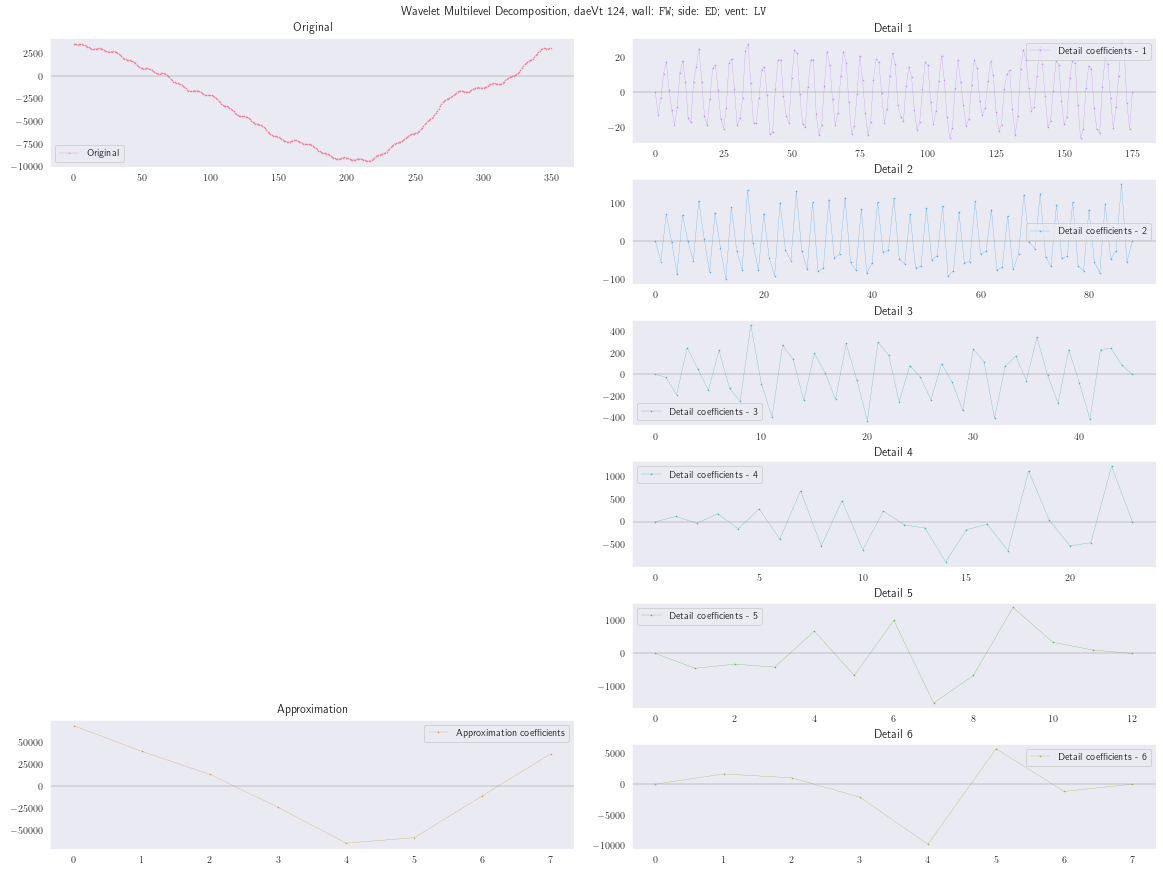

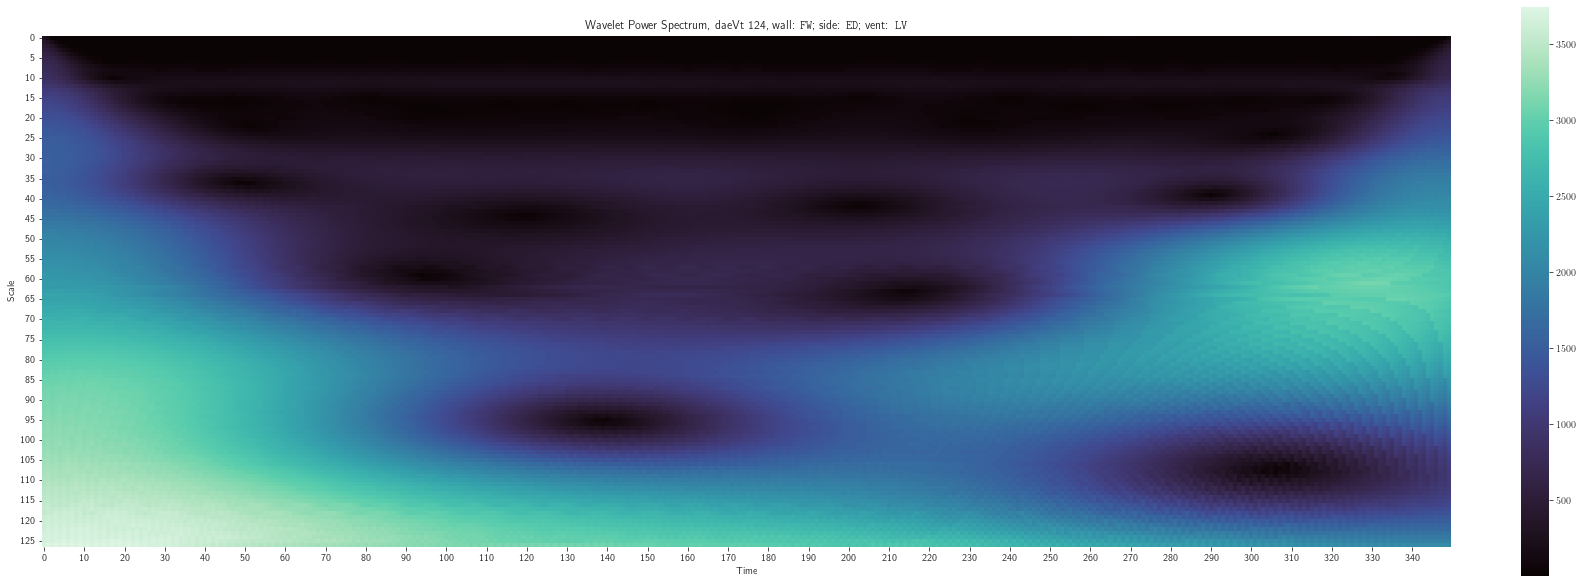

daeVt 5, wall: SP; side: EP; vent: NA


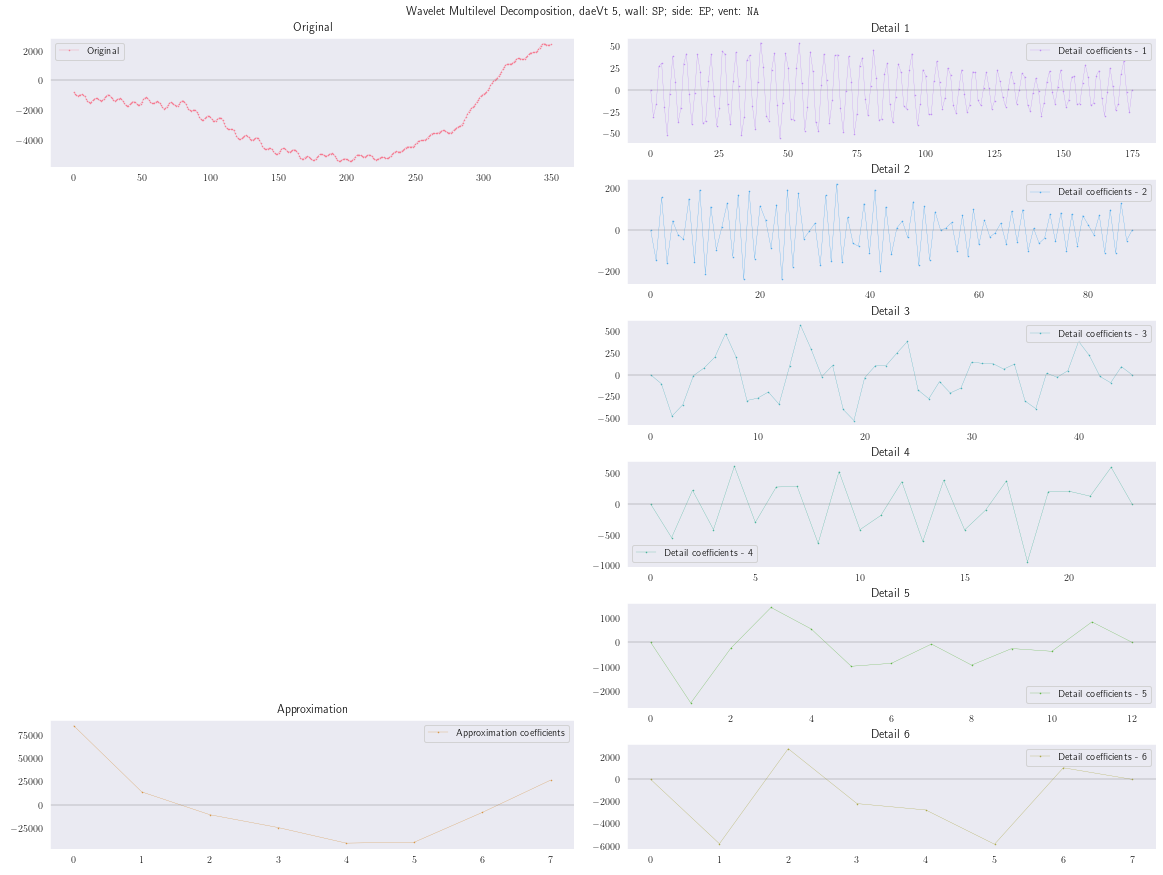

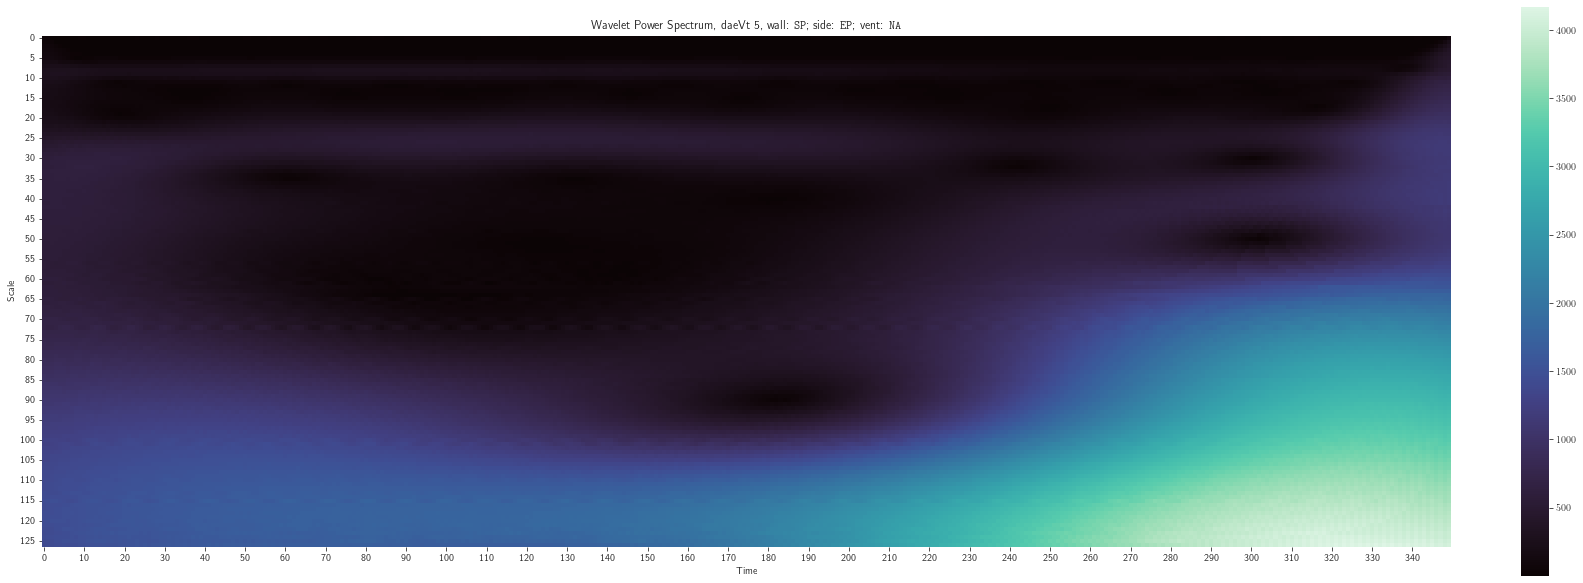

daeVt 2, wall: SP; side: IM; vent: NA


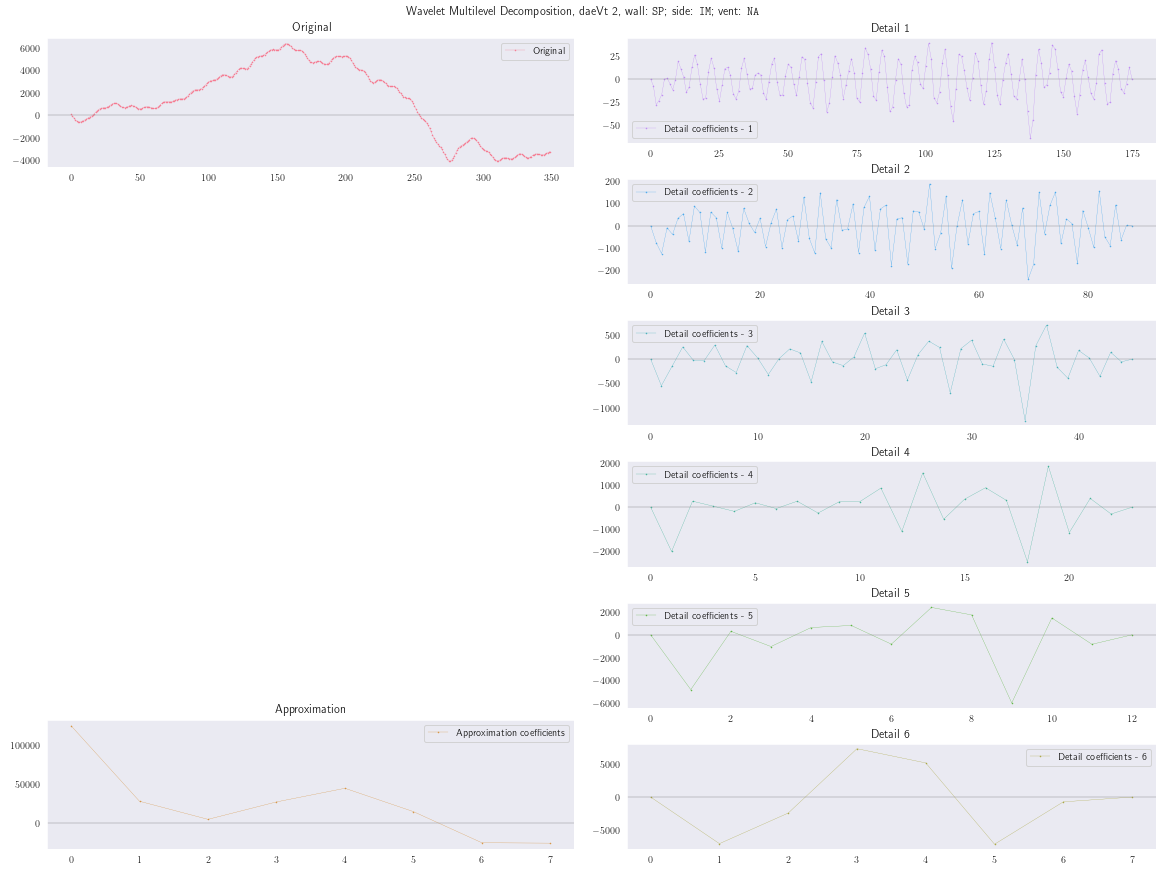

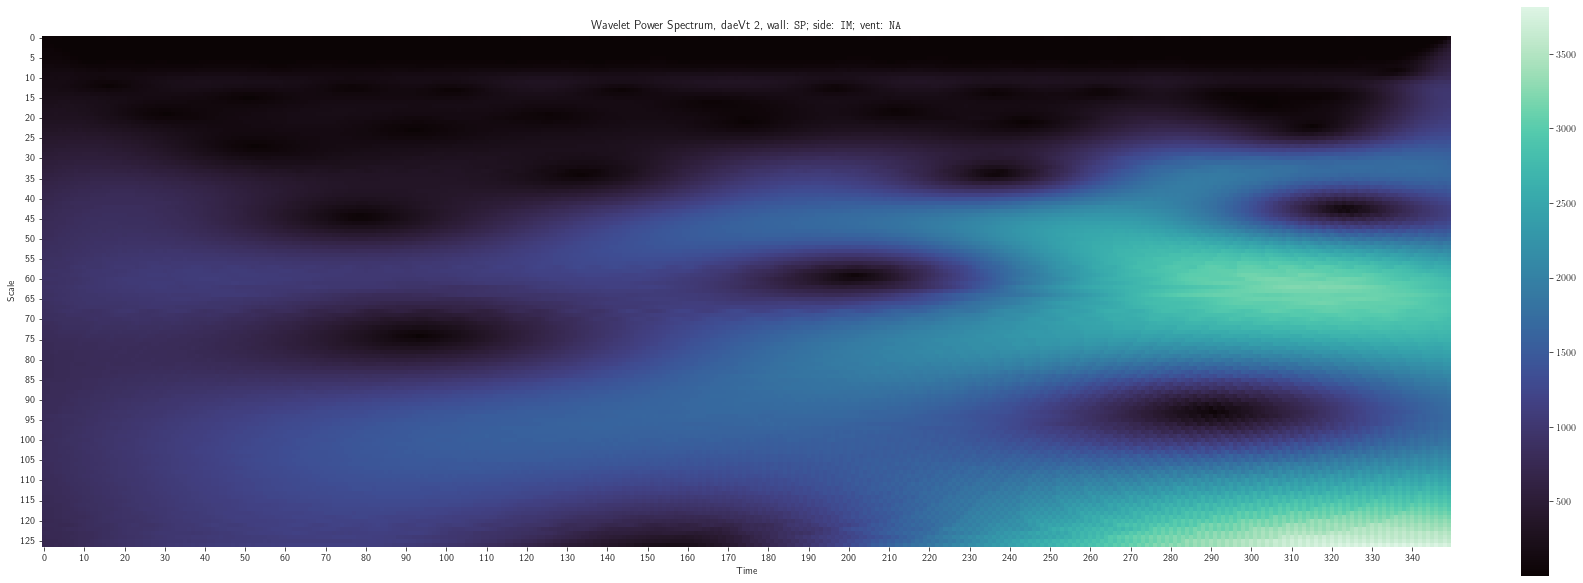

daeVt 79, wall: SP; side: ED; vent: LV


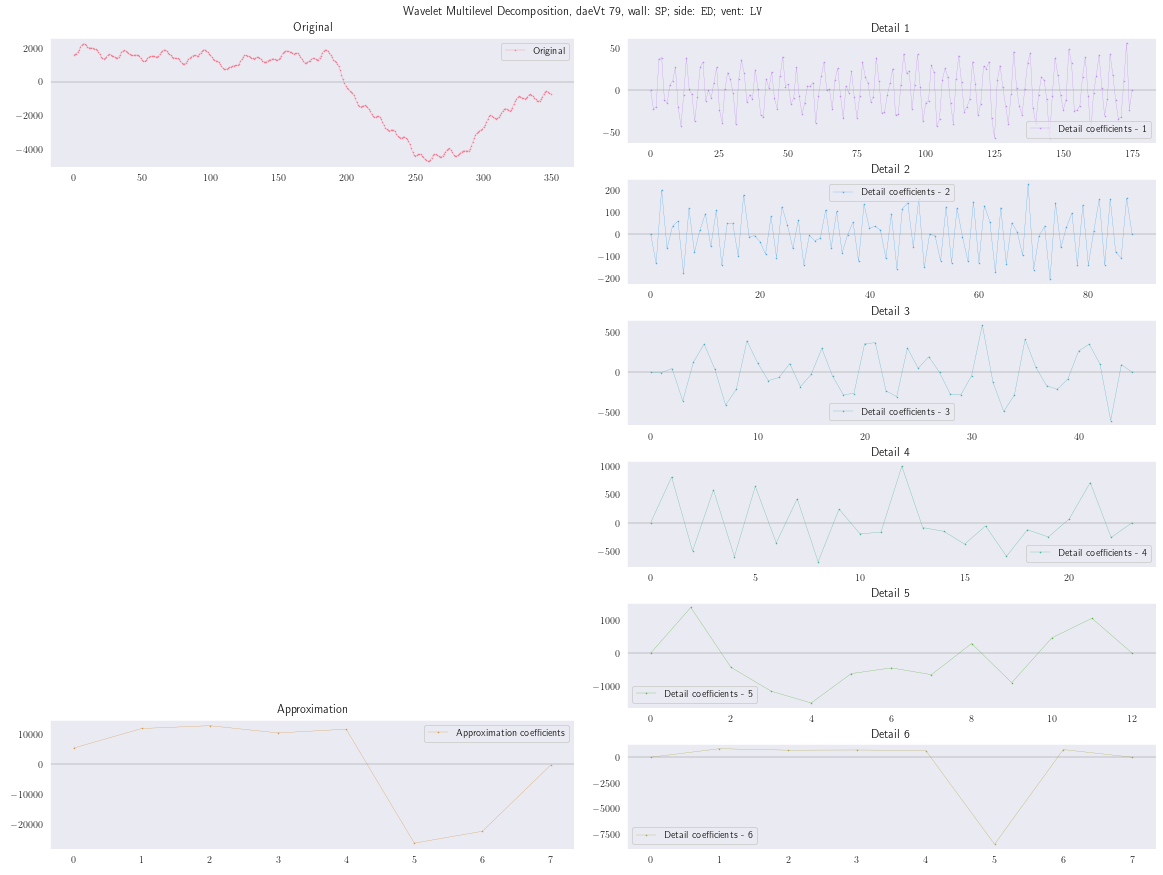

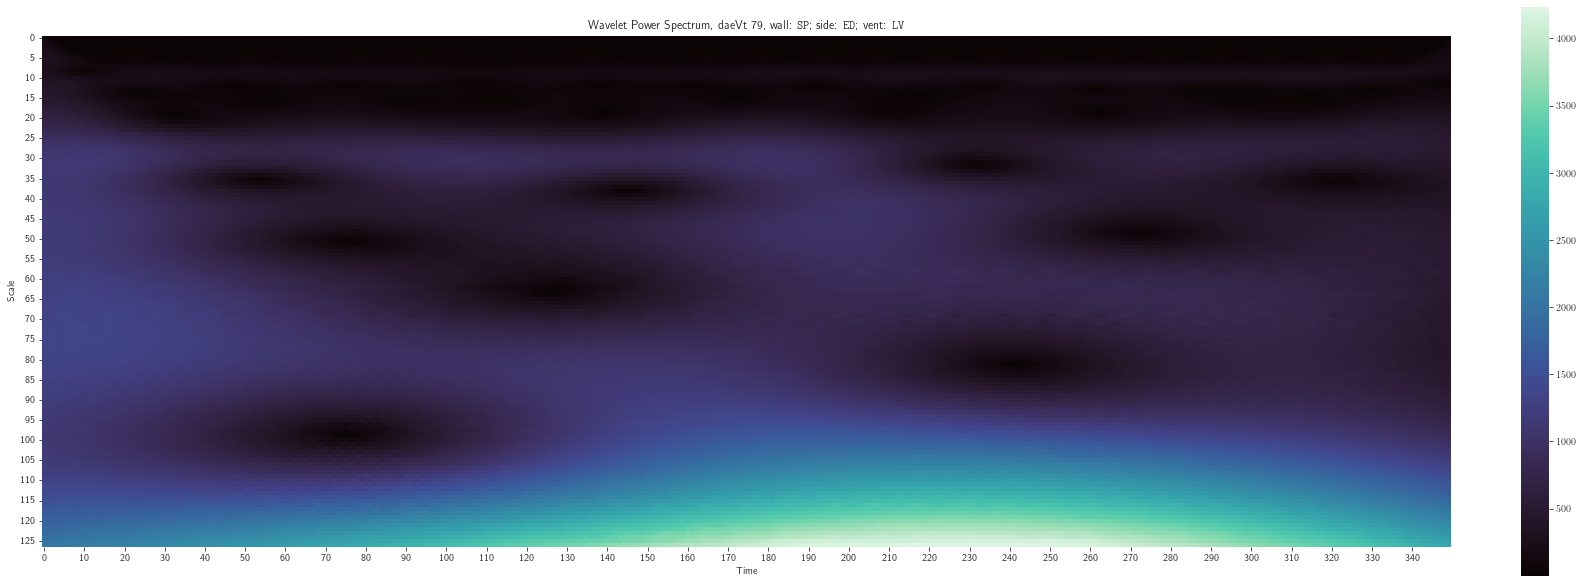

daeVt 0, wall: SP; side: ED; vent: RV


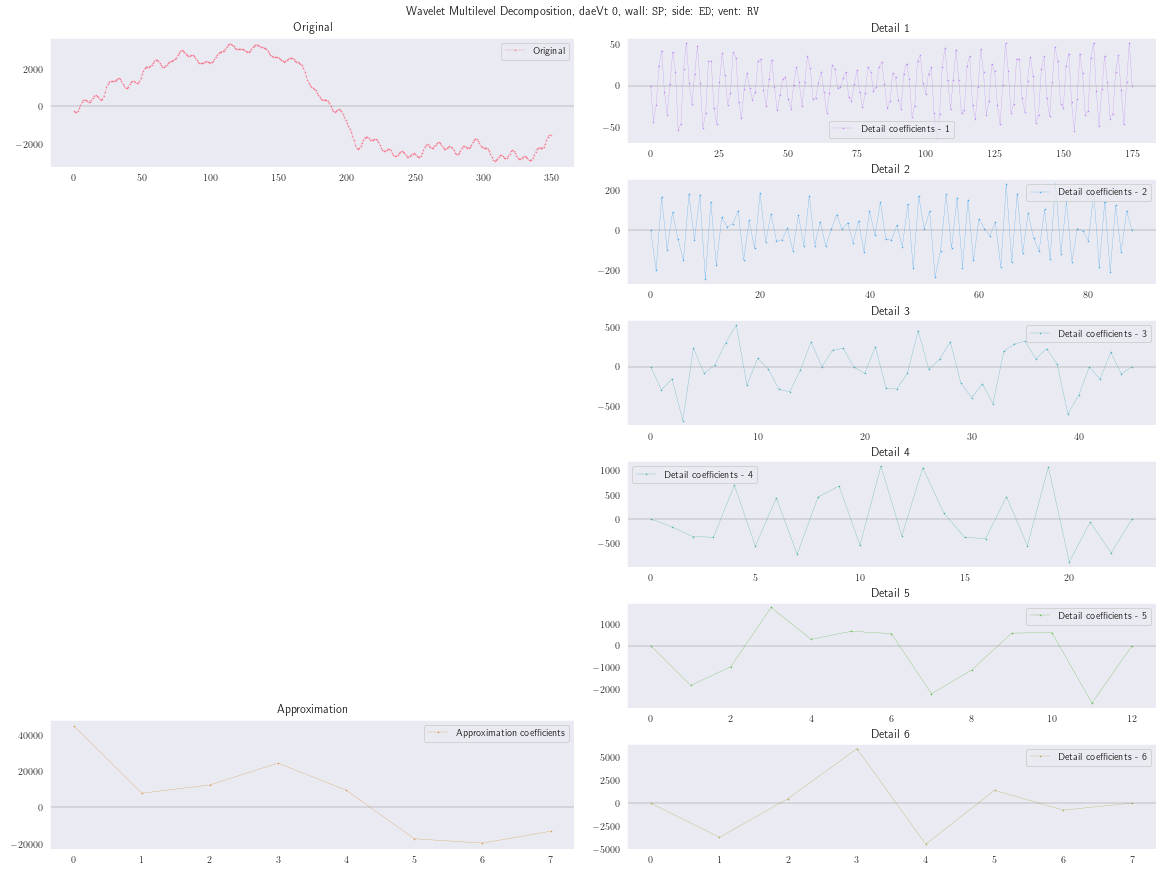

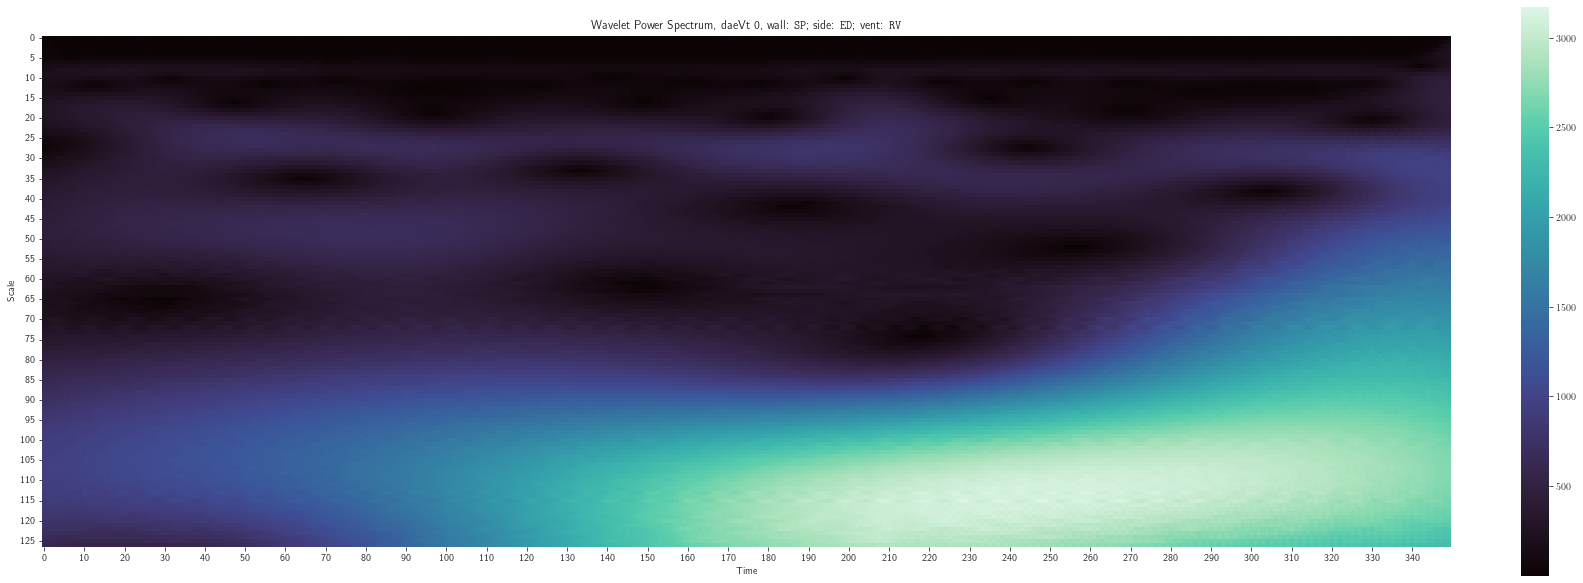

In [2]:
ecgs = dg(f'{dnm}.ecg')
labels = EcgLabel(dnm)

w_dis = 'db2'
lvl_dis = 6
w_cont = 'cmor1.5-1.0'
scl_cont = 128

for idx, row in labels.unique().iterrows():
    def _title(t):
        return f'{dnm} {idx}, {t}'

    sig = ecgs[idx][:350]  # Pick 1st lead
    print(_title(srs2str(row, keys=labels.label_types, tex=False)))

    title = _title(srs2str(row, keys=labels.label_types))
    plot_wavelet_dwt(sig, w_dis, level=lvl_dis, title=title)
    plot_wavelet_cwt(sig, w_cont, max_scale=scl_cont, title=title)
